In [58]:
import numpy as np
import pandas as pd

In [3]:
hrdata = pd.read_csv("C:\Data_Science\Jigsaw Academy\ML\session_files\hr.csv")
hrdata.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  Attrition  promotion_last_5years  \
0                   3              0          1                      0   
1                   6              0          1                      0   
2                   4              0          1                      0   
3                   5              0          1                      0   
4                   3              0          1                      0   

  Department  Salary  
0      sales     low  
1      sales  medium  
2      sales  medium  
3      sales     low  
4      sales     low

In [4]:
hrdata.shape

(14999, 10)

In [5]:
hrdata.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
Attrition                0
promotion_last_5years    0
Department               0
Salary                   0
dtype: int64

In [6]:
hrdata['Attrition'].value_counts()

0    11428
1     3571
Name: Attrition, dtype: int64

In [11]:
hrdata.duplicated().sum()
## we have 3008 duplicates so we need to drop 3008 duplicates

3008

In [12]:
## target variable
df=hrdata.copy()

In [13]:
df.drop_duplicates(inplace=True)

In [15]:
df.head(2)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   

   time_spend_company  Work_accident  Attrition  promotion_last_5years  \
0                   3              0          1                      0   
1                   6              0          1                      0   

  Department  Salary  
0      sales     low  
1      sales  medium

In [16]:
df['Attrition'].value_counts(normalize=True)

0    0.833959
1    0.166041
Name: Attrition, dtype: float64

In [23]:
## converting categorical to numerical

In [17]:
from sklearn import preprocessing

In [18]:
label_encoder = preprocessing.LabelEncoder()

In [20]:
df['Salary']= label_encoder.fit_transform(df['Salary'])
df.head(2)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   

   time_spend_company  Work_accident  Attrition  promotion_last_5years  \
0                   3              0          1                      0   
1                   6              0          1                      0   

  Department  Salary  
0      sales       1  
1      sales       2

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   Attrition              11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   Department             11991 non-null  object 
 9   Salary                 11991 non-null  int32  
dtypes: float64(2), int32(1), int64(6), object(1)
memory usage: 983.6+ KB


In [22]:
df['Department']= label_encoder.fit_transform(df['Department'])
df.head(2)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   

   time_spend_company  Work_accident  Attrition  promotion_last_5years  \
0                   3              0          1                      0   
1                   6              0          1                      0   

   Department  Salary  
0           7       1  
1           7       2

In [24]:
## applying min-max scalar-

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
# scaler = StandardScaler()
# model = scaler.fit(df)
# scaled_data = model.transform(df)

In [27]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  Attrition  promotion_last_5years  \
0                   3              0          1                      0   
1                   6              0          1                      0   
2                   4              0          1                      0   
3                   5              0          1                      0   
4                   3              0          1                      0   

   Department  Salary  
0           7       1  
1           7       2  
2           7       2  
3           7       1  
4           7       1

In [29]:
from sklearn.preprocessing import MinMaxScaler
cols=["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", "time_spend_company"]
sc = MinMaxScaler()
for col in cols:
    df[col] = sc.fit_transform(df[col].values.reshape(-1,1))

In [30]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0            0.318681         0.265625             0.0              0.285047   
1            0.780220         0.781250             0.6              0.775701   
2            0.021978         0.812500             1.0              0.822430   
3            0.692308         0.796875             0.6              0.593458   
4            0.307692         0.250000             0.0              0.294393   

   time_spend_company  Work_accident  Attrition  promotion_last_5years  \
0               0.125              0          1                      0   
1               0.500              0          1                      0   
2               0.250              0          1                      0   
3               0.375              0          1                      0   
4               0.125              0          1                      0   

   Department  Salary  
0           7       1  
1           7       2  
2           7       2  
3           7       1  
4           7       1

In [32]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [33]:
df['Attrition'].value_counts(normalize=True)

0    0.833959
1    0.166041
Name: Attrition, dtype: float64

In [35]:
## splitting up the training and test data-

In [34]:
from sklearn.model_selection import train_test_split

In [45]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,stratify=y,random_state=1)

In [46]:
print(f'xtrain shape{xtrain.shape}')
print(f'xtest shape{xtest.shape}')
print(f'ytrain shape{ytrain.shape}')
print(f'ytest shape{ytest.shape}')

xtrain shape(9592, 9)
xtest shape(2399, 9)
ytrain shape(9592,)
ytest shape(2399,)


In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
ytrain.value_counts(normalize=True)

0    0.833924
1    0.166076
Name: Attrition, dtype: float64

In [49]:
ytest.value_counts(normalize=True)

0    0.834098
1    0.165902
Name: Attrition, dtype: float64

In [50]:
knn = KNeighborsClassifier()

In [51]:
knn.fit(xtrain,ytrain)
y_pred = knn.predict(xtest)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_pred)

0.9503959983326385

In [56]:
from sklearn.metrics import precision_score
precision_score(ytest,y_pred)

0.8461538461538461

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  float64
 3   average_montly_hours   11991 non-null  float64
 4   time_spend_company     11991 non-null  float64
 5   Work_accident          11991 non-null  int64  
 6   Attrition              11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   Department             11991 non-null  int32  
 9   Salary                 11991 non-null  int32  
dtypes: float64(5), int32(2), int64(3)
memory usage: 936.8 KB


In [59]:
xtrain.head(2)

satisfaction_level  last_evaluation  number_project  \
2757            0.450549         0.500000             0.4   
6560            0.527473         0.359375             0.4   

      average_montly_hours  time_spend_company  Work_accident  \
2757              0.303738               0.125              0   
6560              0.514019               0.125              0   

      promotion_last_5years  Department  Salary  
2757                      0           7       2  
6560                      0           1       2

In [60]:
ytrain.head(2)

2757    0
6560    0
Name: Attrition, dtype: int64

C:\Users\shivantripathi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


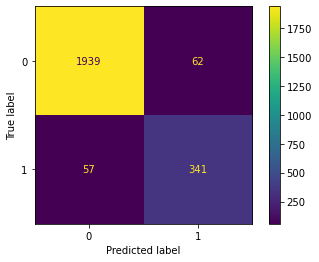

In [62]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn,xtest,ytest)

In [ ]:
# confusion

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
knn = KNeighborsClassifier()

In [65]:
tuned_parameters = {'n_neighbors':range(3,20,2), 'metric': ['euclidean', 'minkowski']}

In [66]:
clf = GridSearchCV(knn,tuned_parameters, cv = 10, scoring = 'roc_auc')

In [67]:
clf.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'minkowski'],
                         'n_neighbors': range(3, 20, 2)},
             scoring='roc_auc')

In [77]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [78]:
clf.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [79]:
clf.best_score_

0.9412516170560833

In [80]:
from sklearn.model_selection import KFold

In [83]:
clf1 = KNeighborsClassifier(metric='euclidean', n_neighbors= 5)

In [84]:
clf1.fit(xtrain,ytrain)
y_pred = clf1.predict(xtest)

In [85]:
precision_score(ytest,y_pred)

0.8461538461538461

In [87]:
from sklearn.metrics import roc_auc_score
roc_auc_score(ytest,clf1.predict_proba(xtest)[:,1])

0.9468249543569924

so this model is very good, we can go ahead with this model

In [89]:
## another method- using KFold CV
from sklearn.model_selection import KFold

In [90]:
X = df.drop('Attrition', axis = 1)

In [91]:
X.head(3)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0            0.318681         0.265625             0.0              0.285047   
1            0.780220         0.781250             0.6              0.775701   
2            0.021978         0.812500             1.0              0.822430   

   time_spend_company  Work_accident  promotion_last_5years  Department  \
0               0.125              0                      0           7   
1               0.500              0                      0           7   
2               0.250              0                      0           7   

   Salary  
0       1  
1       2  
2       2

In [99]:
Y = df['Attrition']

In [100]:
Y.head(3)

0    1
1    1
2    1
Name: Attrition, dtype: int64

In [101]:
Y

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: Attrition, Length: 11991, dtype: int64

In [102]:
## instead of splitting the data set into training and test data set, we split the data into lets say 10 folds in the 'KFold cv'

In [103]:
type(X.columns.values)

numpy.ndarray

In [104]:
from sklearn.model_selection import cross_val_score

In [112]:
s = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
s
## higher the cv value, more the model will be trained but give between 5-20
## by default it is cv=5 so no need to specify if the cv value is to be kept as 5

array([0.95083333, 0.96914095, 0.94745621, 0.9441201 , 0.94662219,
       0.94912427, 0.9557965 , 0.94245204, 0.94829024, 0.93411176])

In [113]:
np.mean(s)

0.9487947595218238

### Handling Imbalanced Class Problem-

* Stratified K-fold sampling
* Upsampling
* Downsampling
* SMOTE (Synthetic Minority Over-sampling Technique)

here imbalanced data is the equal percentage of 0s and 1s in the target variable

In [114]:
# Stratified K-fold
from sklearn.model_selection import StratifiedKFold

In [115]:
skf = StratifiedKFold(n_splits=10)
s1 = cross_val_score(knn, X, Y, cv=10, scoring='roc_auc')

In [116]:
s1

array([0.94407   , 0.9566407 , 0.93721106, 0.92512312, 0.94089447,
       0.94790704, 0.95600251, 0.94596482, 0.94221106, 0.94067337])

In [117]:
s1.mean()

0.9436698140703517

### upsampling(oversampling) and downsampling(undersampling)

In [118]:
# from IPython.display import Image
# Image(filename = 'abc.png')
# ## this code is just for printing the image here

In [119]:
from sklearn.utils import resample

In [121]:
## 800-200 ratio so I will make 600 copies of minority records so the minority records will be equal to majority records, 
## so here the duplicate records of minority class are created (600 duplicate copies are created)

In [122]:
## so this way the number of zeroes and ones are equal of the target variable

In [140]:
# before downsampling-
print(f'count of minority class records: {xtrain[ytrain==1].shape[0]}')
print(f'count of majority class records before downsampling: {xtrain[ytrain==0].shape[0]}')

count of minority class records: 1593
count of majority class records before downsampling: 7999


In [141]:
## downsampling of majority class-
xtrain_down, ytrain_down = resample(xtrain[ytrain==0],ytrain[ytrain==0], n_samples=xtrain[ytrain==1].shape[0], random_state=10)

In [142]:
print(f'count of minority class records: {xtrain[ytrain==1].shape[0]}')
print(f'count of majority class records after downsampling: {xtrain_down.shape[0]}')

count of minority class records: 1593
count of majority class records after downsampling: 1593


In [143]:
# total records = combine majority+minority class records
x_train_down = np.concatenate((xtrain[ytrain==1], xtrain_down))
y_train_down = np.concatenate((ytrain[ytrain==1], ytrain_down))

In [147]:
x_train_down.shape[0]

3186

In [151]:
pd.DataFrame(x_train_down)

0         1    2         3      4    5    6    7    8
0     0.395604  0.140625  0.0  0.205607  0.125  0.0  0.0  6.0  1.0
1     0.000000  0.750000  1.0  0.985981  0.250  0.0  0.0  0.0  2.0
2     0.890110  0.937500  0.4  0.757009  0.375  0.0  0.0  9.0  2.0
3     0.857143  1.000000  0.6  0.831776  0.375  0.0  0.0  3.0  1.0
4     0.021978  0.796875  0.8  0.859813  0.250  0.0  0.0  9.0  1.0
...        ...       ...  ...       ...    ...  ...  ...  ...  ...
3181  0.780220  0.718750  0.2  0.383178  0.125  0.0  0.0  8.0  1.0
3182  0.681319  0.796875  0.6  0.359813  0.125  0.0  0.0  7.0  1.0
3183  0.703297  0.593750  0.6  0.626168  0.125  0.0  0.0  8.0  1.0
3184  0.439560  0.593750  0.2  0.621495  0.125  1.0  0.0  0.0  1.0
3185  0.615385  0.328125  0.2  0.663551  0.125  0.0  0.0  3.0  1.0

[3186 rows x 9 columns]

In [153]:
xtrain.shape

(9592, 9)

In [150]:
x_train_down.shape

(3186, 9)

In [146]:
knn.fit(x_train_down,y_train_down)
y_pred_down = knn.predict(xtest)

C:\Users\shivantripathi\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [160]:
## upsampling - 
print(f'count of minority class records: {xtrain[ytrain==1].shape[0]}')
print(f'count of majority class records before downsampling: {xtrain[ytrain==0].shape[0]}')

count of minority class records: 1593
count of majority class records before downsampling: 7999


In [161]:
xtrain_up, ytrain_up = resample(xtrain[ytrain==1],ytrain[ytrain==1], n_samples=xtrain[ytrain==0].shape[0], random_state=10)

In [162]:
print(f'count of minority class records: {xtrain[ytrain==0].shape[0]}')
print(f'count of majority class records before downsampling: {xtrain_up.shape[0]}')

count of minority class records: 7999
count of majority class records before downsampling: 7999


In [163]:
# total records = combine majority+minority class records
x_train_up = np.concatenate((xtrain[ytrain==0], xtrain_up))
y_train_up = np.concatenate((ytrain[ytrain==0], ytrain_up))

In [164]:
x_train_up.shape[0]

15998

### apply SMOTE to balance the data

In [165]:
pip install imblearn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [166]:
from imblearn.over_sampling import SMOTE

In [167]:
sm = SMOTE(random_state=10)

In [168]:
## before SMOTE-
print(f'count of minority class records before upsampling: {xtrain[ytrain==1].shape[0]}')
print(f'count of existing majority class records: {xtrain[ytrain==0].shape[0]}')

count of minority class records before upsampling: 1593
count of existing majority class records: 7999


In [169]:
xtrain_smote, ytrain_smote = sm.fit_resample(xtrain,ytrain)

In [170]:
## after SMOTE
print(f'count of minority class records after applying SMOTE: {xtrain_smote[ytrain_smote==1].shape[0]}')
print(f'count of existing majority class records: {xtrain_smote[ytrain_smote==0].shape[0]}')

count of minority class records after applying SMOTE: 7999
count of existing majority class records: 7999


In [171]:
ytrain_smote.value_counts()

0    7999
1    7999
Name: Attrition, dtype: int64

In [172]:
knn.fit(xtrain_smote,ytrain_smote)
y_pred_smote = knn.predict(xtest)

In [174]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred_smote))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      2001
           1       0.72      0.89      0.80       398

    accuracy                           0.92      2399
   macro avg       0.85      0.91      0.87      2399
weighted avg       0.93      0.92      0.93      2399

